<a href="https://colab.research.google.com/github/shree535/AI/blob/main/Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Loading file: Phishing.csv
🎯 Target Column: Label
🧠 Features being used: ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards']

===== 📊 Machine Learning Model Results =====

Random Forest Accuracy: 85.80%
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1012
           1       0.96      0.74      0.84       988

    accuracy                           0.86      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.88      0.86      0.86      2000


Support Vector Machine Accuracy: 79.25%
              precision    recall  f1-score   support

           0       0.71      0.98      0.83      1012
           1       0.97      0.60      0.74       988

    accuracy                           0.79      2000
   macro avg       0.84      0.79      0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

ANN Accuracy: 83.65%
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1012
           1       0.92      0.74      0.82       988

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.83      2000
weighted avg       0.85      0.84      0.83      2000


🏆 Best Model: Random Forest with 85.80% Accuracy


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


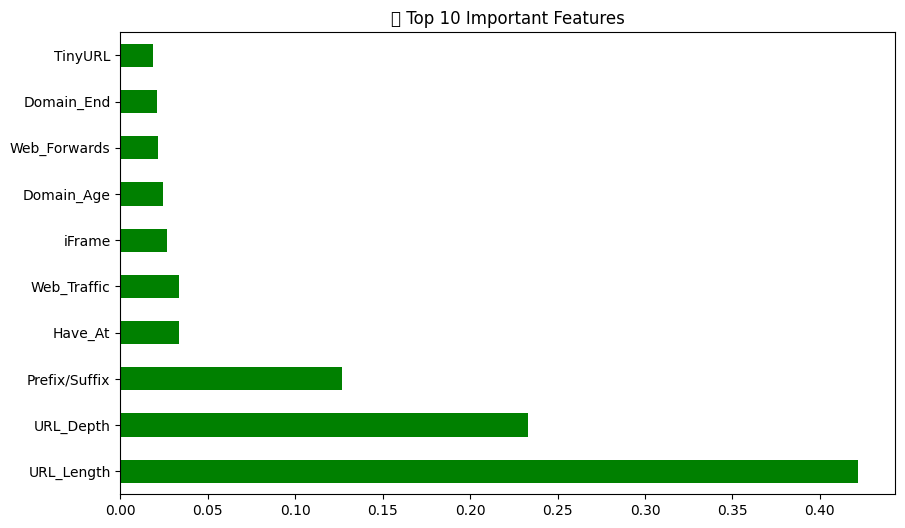

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


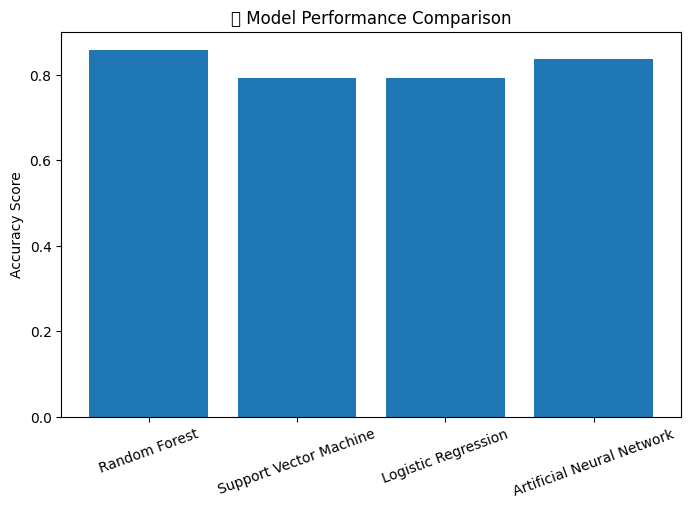

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, classification_report


# ---------------- Load CSV File ----------------
possible_files = [f for f in os.listdir() if f.endswith('.csv')]

if not possible_files:
    print("❌ Error: No CSV file found. Please re-upload.")
    exit()

filename = possible_files[0]
print(f"📌 Loading file: {filename}")
df = pd.read_csv(filename)

target_col = 'Label'

if target_col not in df.columns:
    target_col = df.columns[-1]

print(f"🎯 Target Column: {target_col}")

y = df[target_col]
X = df.drop(target_col, axis=1)

X = X.select_dtypes(include=[np.number])

print(f"🧠 Features being used: {list(X.columns)}")


# ---------------- Data Split & Scaling ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ---------------- Machine Learning Models ----------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

print("\n===== 📊 Machine Learning Model Results =====")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results[name] = acc
    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred))


# ---------------- ANN Model ----------------
print("\n===== 🤖 Training Artificial Neural Network (ANN) =====")

ann = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For Binary classification
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

y_pred_ann = (ann.predict(X_test_scaled) > 0.5).astype(int)

ann_acc = accuracy_score(y_test, y_pred_ann)
results["Artificial Neural Network"] = ann_acc

print(f"\nANN Accuracy: {ann_acc*100:.2f}%")
print(classification_report(y_test, y_pred_ann))


# ---------------- Best Model ----------------
best_model = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model} with {results[best_model]*100:.2f}% Accuracy")


# ---------------- Feature Importance (RandomForest) ----------------
rf = models["Random Forest"]
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title('🔥 Top 10 Important Features')
plt.show()


# ---------------- Accuracy Comparison Graph ----------------
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.xticks(rotation=20)
plt.ylabel("Accuracy Score")
plt.title("📊 Model Performance Comparison")
plt.show()


In [ ]:
import re

def extract_features(url):
    domain = url.split("/")[2] if "//" in url else url

    return {
        "Have_IP": 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0,
        "URL_Length": len(url),
        "URL_Depth": url.count('/') - 2,
        "Redirection": 1 if "//" in url[8:] else 0,
        "https_Domain": 1 if url.startswith("https") else 0,
        "TinyURL": 1 if any(s in url for s in ["bit.ly","tinyurl","goo.gl","t.co"]) else 0,
        "Prefix/Suffix": 1 if "-" in domain else 0,
        "Web_Traffic": 1 if any(s in domain for s in ["google","facebook","youtube","amazon","twitter"]) else 0,  # popular sites
        "Domain_End": 0 if domain.endswith((".com",".org",".in",".net",".edu",".gov")) else 1,
        "iFrame": 0,
        "Mouse_Over": 0,
        "Right_Click": 0,
        "Web_Forwards": 0
    }

while True:
    user_url = input("Website URL: ")

    if user_url.lower() == "exit":
        print("Stopping prediction module.")
        break

    features = extract_features(user_url)
    input_df = pd.DataFrame([features])


    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    input_scaled = scaler.transform(input_df)
    pred = models[best_model].predict(input_scaled)

    if pred[0] == 1:
        print("⚠️ This website is likely a PHISHING website ❌")
    else:
        print("🟢 This website seems SAFE / LEGITIMATE ✔️")


Website URL: google.com
🟢 This website seems SAFE / LEGITIMATE ✔️
Website URL: Dropbox Login Page.
⚠️ This website is likely a PHISHING website ❌
Website URL: exit
Stopping prediction module.
